In [1]:
import os

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import sys
import pandas as pd
#import tensorflow
#import keras
import wordcloud
import nltk
import inspect
import re
import unicodedata

#nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import RSLPStemmer #Stemmer for portugese words.

from nltk.probability import FreqDist
from collections import defaultdict
from heapq import nlargest
stop = stopwords.words('portuguese')
stop.append('nao') #Stopword already have "Não", just adding this because it's appear on dataframe

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
#import missingno as msno
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
import sys
import math
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#import folium
#from folium.plugins import Fullscreen
#import geopandas as gpd
import json
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as pltimport pandas as pd
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from scipy.stats import shapirofrom scipy.stats import shapiro
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from scipy.stats import boxcox
from matplotlib import pyplotfrom scipy.stats import boxcox
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplotfrom statsmodels.graphics.gofplots import qqplot

#import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp

import os

In [4]:

#os.chdir("/Users/danielacadavid/Documents/Universidad/Maestria/201920/00_Bases/brazilian-ecommerce/")
os.chdir("C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce\\")
os.getcwd()

'C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce'

In [5]:
orders=pd.read_csv('data_tratada_v_nao.csv')

In [6]:
orders['word_count'] = orders.review_comment_message.apply(lambda x: len(str(x).split()))

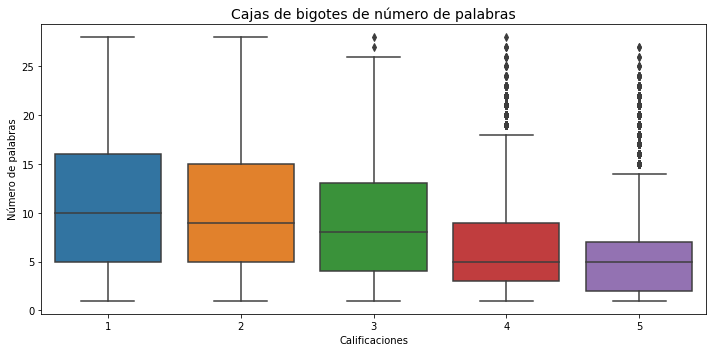

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax=sns.boxplot(x='review_score', y='word_count', data=orders)
ax.set_title('Cajas de bigotes de número de palabras', size=14)
ax.set_ylabel('Número de palabras')
ax.set_xlabel('Calificaciones')

plt.tight_layout()

plt.show()


### ANOVA

In [8]:
stats.f_oneway(orders['word_count'][orders['review_score'] == 1],
               orders['word_count'][orders['review_score'] == 2],
               orders['word_count'][orders['review_score'] == 3],
               orders['word_count'][orders['review_score'] == 4],
               orders['word_count'][orders['review_score'] == 5]
              )

F_onewayResult(statistic=1865.0129805595504, pvalue=0.0)

In [9]:
results = ols('word_count ~ C(review_score)', data=orders).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             word_count   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1865.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:03:17   Log-Likelihood:            -1.2741e+05
No. Observations:               41753   AIC:                         2.548e+05
Df Residuals:                   41748   BIC:                         2.549e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.6725      0.053    199.789      0.000      10.568      10.777
C(review_score)[T.2]    -0.3239      0.121     -2.680      0.007      -0.561      -0.087
C(review_score)[T.3]    -1.7377      0.100    -17.377      0.000      -1.934      -1.542
C(review_score)[T.4]    -3.9682      0.085    -46.783      0.000      -4.134      -3.802
C(review_score)[T.5]    -5.0631      0.064    -78.859      0.000      -5.189      -4.937
==============================================================================
Omnibus:                     4221.223   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5608.303
Skew:                           0.874   Prob(JB):                         0.00
Kurtosis:                       3.411   Cond. No.                         6.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## TESTE DE TUKEY

In [10]:
mc = MultiComparison(orders['word_count'], orders['review_score'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.3239 0.0569 -0.6536  0.0057  False
     1      3  -1.7377  0.001 -2.0105 -1.4649   True
     1      4  -3.9682  0.001 -4.1996 -3.7368   True
     1      5  -5.0631  0.001 -5.2382  -4.888   True
     2      3  -1.4138  0.001 -1.7888 -1.0388   True
     2      4  -3.6442  0.001 -3.9903 -3.2982   True
     2      5  -4.7392  0.001 -5.0504 -4.4279   True
     3      4  -2.2304  0.001 -2.5228 -1.9381   True
     3      5  -3.3254  0.001 -3.5756 -3.0751   True
     4      5  -1.0949  0.001 -1.2992 -0.8906   True
----------------------------------------------------


In [11]:
mc_krus = mc.kruskal()
print(mc_krus)

MultiComparison.kruskal
0 1 617.4361731879544 306.08414306770277 2.0172105846443134 False
0.04367354196109861
0.04367354196109861


## TESTE SHAPIRO WILK PARA NORMALIDAD

In [12]:

data=orders['word_count']
# normality test
stat, p = shapiro(data)

In [13]:
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


## Transformación Box-Cox para normalidad

In [15]:
uno=orders['word_count'][orders['review_score'] == 1]
dos=orders['word_count'][orders['review_score'] == 2]
tres= orders['word_count'][orders['review_score'] == 3]
cuatro=orders['word_count'][orders['review_score'] == 4]
cinco= orders['word_count'][orders['review_score'] == 5]


In [16]:
#order_reviews = order_reviews.dropna(subset=['review_comment_message'])
test=pd.DataFrame([orders['word_count'], orders['review_score']])
orders_array=np.array([orders['word_count'], orders['review_score']],np.int32)
orders_array = orders_array[~np.isnan(orders_array)]
#orders_array=orders_array.dropna

In [17]:
test_a=np.array(data)
test_b=np.array([orders['word_count'], orders['review_score']])
#test_a = test_a[~np.isnan(test_a)]
test_a=test_a.reshape(-1,1)
#test_b=data.reshape(-1,2)
test_a.shape


(41753, 1)

In [18]:
test_a

array([[ 5],
       [12],
       [15],
       ...,
       [ 8],
       [21],
       [ 9]], dtype=int64)

In [20]:
trans=power_transform(test_a, method='box-cox')
#trans

In [21]:
a=PowerTransformer(method='box-cox').fit_transform(test_a)

In [108]:
# normality test
stat_2, p_2 = shapiro(trans2)

# interpret
alpha = 0.05
if p_2 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


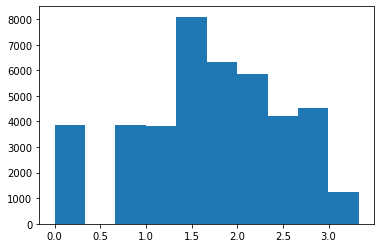

In [166]:

# power transform
trans2 = boxcox(data, 0)
# histogram
pyplot.hist(trans2)
pyplot.show()

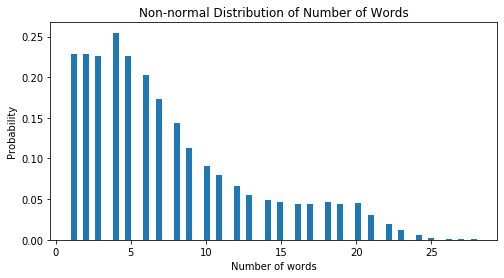

In [233]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(data, bins='auto', density=True)
ax.set_xlabel('Number of words')
ax.set_ylabel('Probability')
ax.set_title('Non-normal Distribution of Number of Words');

Best lambda parameter = 0.212


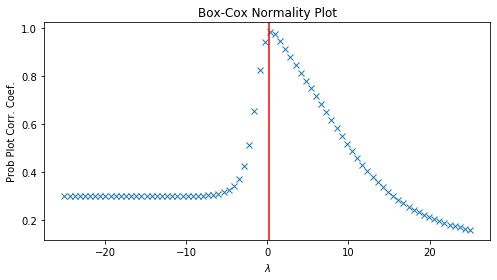

In [243]:
time_duration_trans, lmbda = stats.boxcox(data)
print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(uno, -25, 25, plot=ax)
ax.axvline(lmbda, color='r');

In [235]:
# fit Gaussian distribution

time_duration_trans.sort()
mean, std = stats.norm.fit(time_duration_trans, loc=1)
pdf_norm = stats.norm.pdf(time_duration_trans, mean, std)

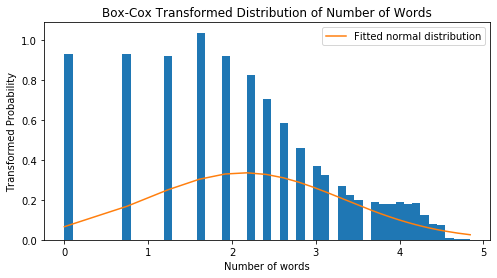

In [236]:
# visual inspection

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(time_duration_trans, bins='auto', density=True)
ax.plot(time_duration_trans, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('Number of words')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution of Number of Words')
ax.legend();

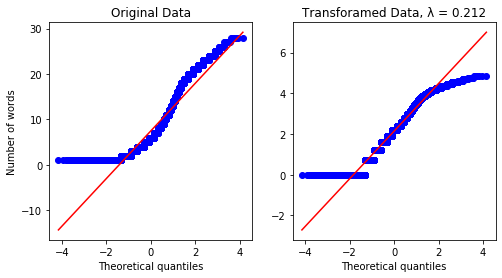

In [238]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

prob = stats.probplot(data, dist=stats.norm, plot=ax1)
prob = stats.probplot(time_duration_trans, dist=stats.norm, plot=ax2)

ax1.set_title('Original Data')
ax1.set_ylabel('Number of words')
ax2.set_title('Transforamed Data, λ = %s' % 0.212);
ax2.set_ylabel('');

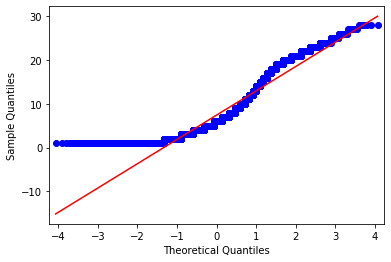

In [239]:
# QQ Plot

qqplot(data, line='s')
pyplot.show()

## Barlett

In [57]:
stats.bartlett(orders['word_count'], orders['review_score'])

BartlettResult(statistic=51571.96977675552, pvalue=0.0)

## Levene con mediana

In [58]:
stats.levene(orders['word_count'], orders['review_score'],center = 'median')

LeveneResult(statistic=21592.09746698573, pvalue=0.0)

In [230]:
stats.levene(time_duration_trans, orders['review_score'],center = 'median')

LeveneResult(statistic=160.9929761566281, pvalue=7.807649511726149e-37)

In [202]:
mc = MultiComparison(orders['word_count'], orders['review_score'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.3239 0.0569 -0.6536  0.0057  False
     1      3  -1.7377  0.001 -2.0105 -1.4649   True
     1      4  -3.9682  0.001 -4.1996 -3.7368   True
     1      5  -5.0631  0.001 -5.2382  -4.888   True
     2      3  -1.4138  0.001 -1.7888 -1.0388   True
     2      4  -3.6442  0.001 -3.9903 -3.2982   True
     2      5  -4.7392  0.001 -5.0504 -4.4279   True
     3      4  -2.2304  0.001 -2.5228 -1.9381   True
     3      5  -3.3254  0.001 -3.5756 -3.0751   True
     4      5  -1.0949  0.001 -1.2992 -0.8906   True
----------------------------------------------------


## Kruskal Wallis

In [62]:
stats.kruskal(orders['word_count'], orders['review_score'])

KruskalResult(statistic=10925.465210896493, pvalue=0.0)

## Non parametric Anova with posthocs

In [226]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,41743,41744,41745,41746,41747,41748,41749,41750,41751,41752
word_count,5,12,15,5,7,7,1,2,4,14,...,8,8,7,17,5,8,16,8,21,9
review_score,5,5,4,4,5,2,1,5,5,5,...,3,2,5,2,4,5,3,5,1,1


In [229]:
x = np.array([[uno],[dos],[tres],[cuatro],[cinco]])
sp.posthoc_dunn(orders,val_col='word_count', group_col='review_score', p_adjust = 'holm')

,1,2,3,4,5
1,-1.000000e+00,2.960141e-02,2.862266e-51,0.000000e+00,0.000000e+00
2,2.960141e-02,-1.000000e+00,1.629521e-19,4.719287e-152,2.280723e-294
3,2.862266e-51,1.629521e-19,-1.000000e+00,7.883985e-84,3.216048e-224
4,0.000000e+00,4.719287e-152,7.883985e-84,-1.000000e+00,2.258303e-29
5,0.000000e+00,2.280723e-294,3.216048e-224,2.258303e-29,-1.000000e+00


In [215]:
print('1,2',stats.kruskal(uno, dos))
print('1,3',stats.kruskal(uno, tres))
print('1,4',stats.kruskal(uno, cuatro))
print('1,5',stats.kruskal(uno, cinco))
print('2,3',stats.kruskal(dos, tres))
print('2,4',stats.kruskal(dos, cuatro))
print('2,5',stats.kruskal(dos, cinco))
print('3,4',stats.kruskal(tres, cuatro))
print('3,5',stats.kruskal(cuatro, cinco))
print('4,5',stats.kruskal(cuatro, cinco))

1,2 KruskalResult(statistic=5.200326334718878, pvalue=0.022582648184474603)
1,3 KruskalResult(statistic=227.33478566826352, pvalue=2.272981108960781e-51)
1,4 KruskalResult(statistic=1733.0526767379592, pvalue=0.0)
1,5 KruskalResult(statistic=4856.059989317402, pvalue=0.0)
2,3 KruskalResult(statistic=81.13752158285726, pvalue=2.1054423842580973e-19)
2,4 KruskalResult(statistic=668.1055552318609, pvalue=2.579834895825972e-147)
2,5 KruskalResult(statistic=1369.593265281722, pvalue=8.509988105590344e-300)
3,4 KruskalResult(statistic=363.83783406557956, pvalue=4.1107281375631917e-81)
3,5 KruskalResult(statistic=116.02941227589162, pvalue=4.682995231318232e-27)
4,5 KruskalResult(statistic=116.02941227589162, pvalue=4.682995231318232e-27)
